In [46]:
#import libraries
import numpy as np                                    # for array manipulation
import pandas as pd                                   # for reading data into usable obj
import matplotlib.pyplot as plt                       # for vizualisation
from sklearn.preprocessing import StandardScaler      # for scaling data properly
from imblearn.over_sampling import RandomOverSampler  # for oversampling from small dataset
from sklearn.neighbors import KNeighborsClassifier    # for KNN classifier
from sklearn.metrics import classification_report     # for viewing classification report
from sklearn.naive_bayes import GaussianNB            # for Naive Bayes classifier
from sklearn.linear_model import LogisticRegression   # for Logistic Regression classifier
from sklearn.svm import SVC                           # for Support Vector Machine classifier
import tensorflow as tf                               # for Neural Network


Read the imported magic03.data dataset

In [47]:
#read dataset
#add headers to data
columns = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long',
            'fM3Trans', 'fAlpha', 'fDist', 'class']
dataframe = pd.read_csv("magic04.data", names= columns);
dataframe.head()



fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g

In [48]:
#map class attribute to numbers for easier analysis
dataframe['class'] = (dataframe['class'] == 'g').astype(int)
dataframe.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist  class  
0  40.0920   81.8828      1  
1   6.3609  205.2610      1  
2  76.9600  256.7880      1  
3  10.4490  116.7370      1  
4   4.6480  356.4620      1

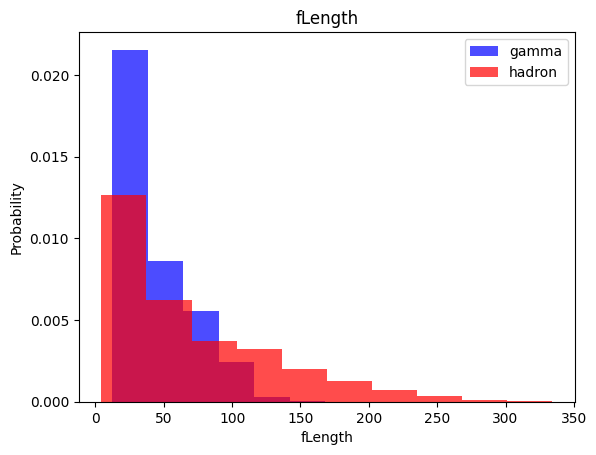

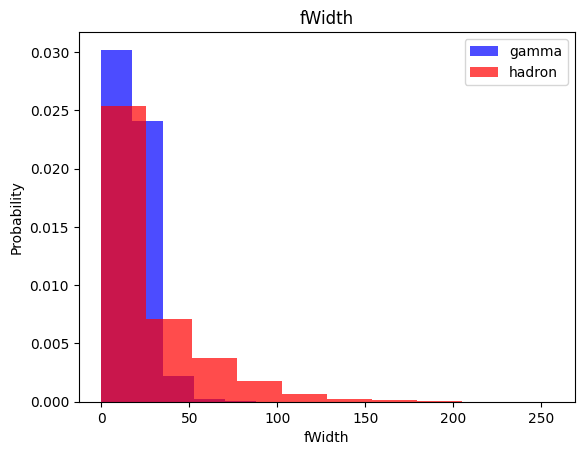

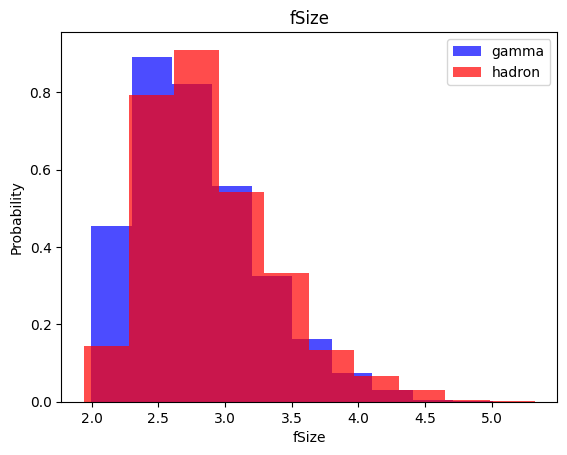

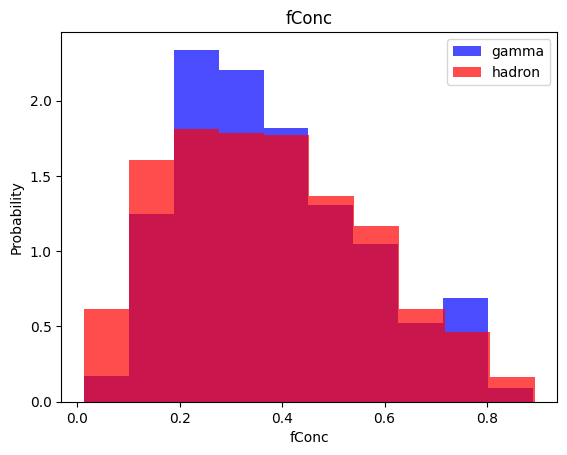

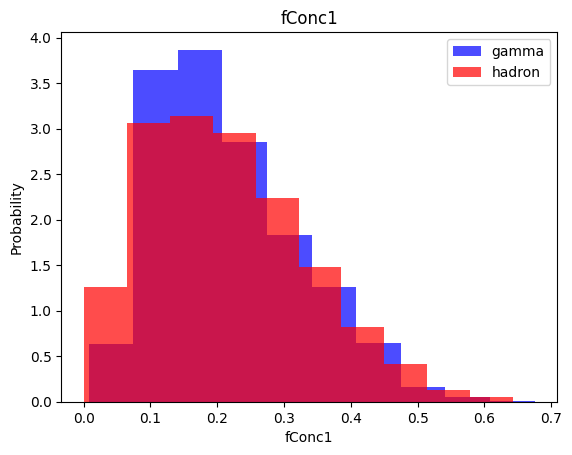

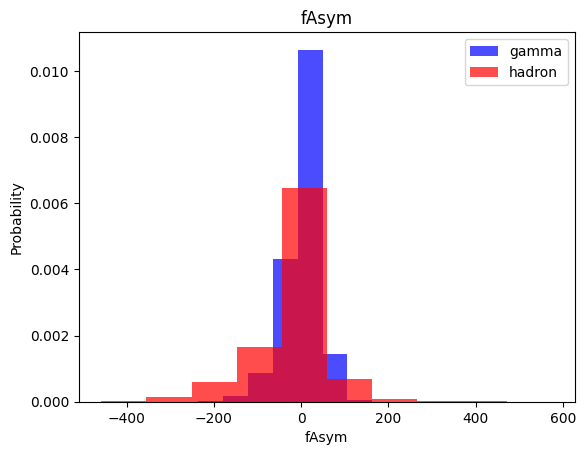

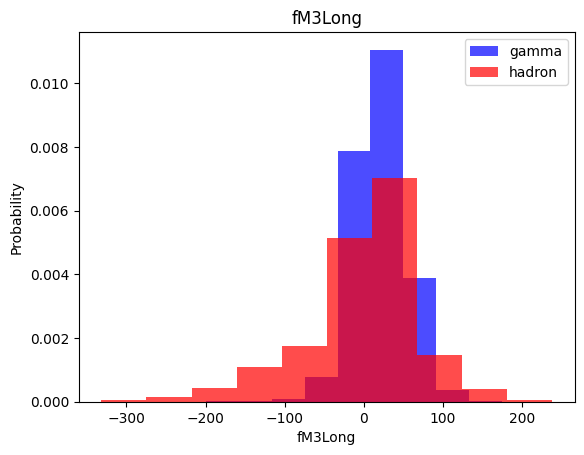

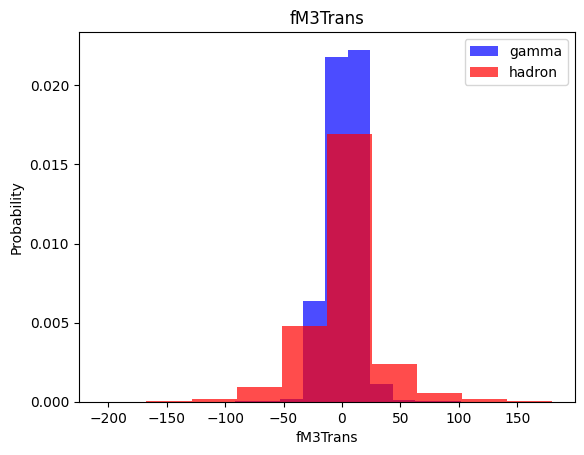

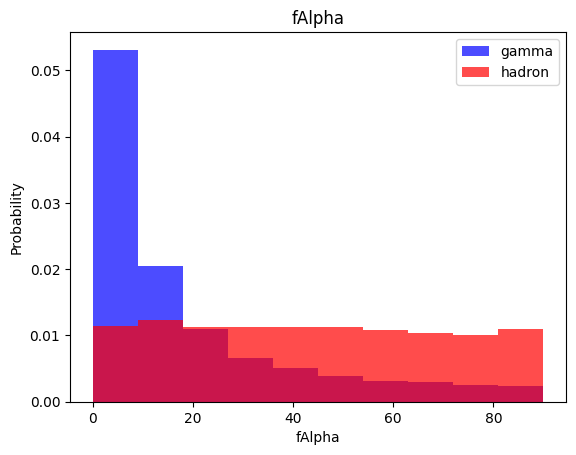

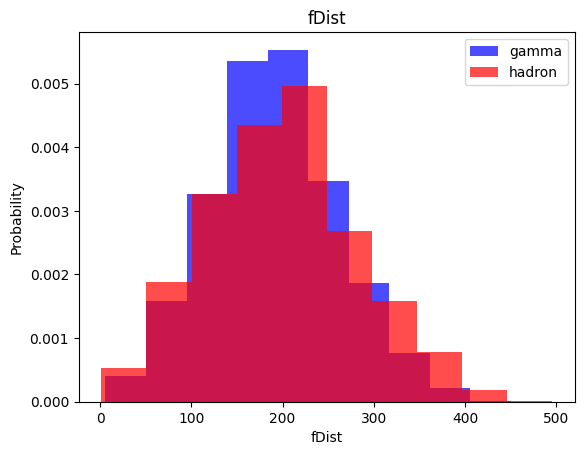

In [49]:
#plot features on histogram
for label in columns[:-1]:
  # alpha is transparency, density normalizes distribution (one high and one low)
  plt.hist(dataframe[dataframe['class'] == 1][label], color= 'blue',
                                               label= 'gamma', alpha= 0.7, density = True);
  plt.hist(dataframe[dataframe['class'] == 0][label], color= 'red',
                                               label= 'hadron', alpha= 0.7, density = True);
  plt.title(label);
  plt.ylabel('Probability');
  plt.xlabel(label);
  plt.legend();
  plt.show();

Train, validation, test datasets

In [50]:
#split and shuffle dataset
#sample function shuffle the data
# split in 60, 20, 20 ratio (training, validation, and testing)
train, valid, test = np.split(dataframe.sample(frac = 1), 
                              [int(0.6*len(dataframe)), int(0.8*len(dataframe))]);

In [51]:
#scale dataset, and oversample if data is unbalanced
def balance_dataset (dataframe, overSample = False):
  #get all columns except output column in new dataframe
  X = dataframe[dataframe.columns[:-1]].values;
  y = dataframe[dataframe.columns[-1]].values;

  #fit data to scale
  scaler = StandardScaler();
  X = scaler.fit_transform(X);

  # keep sampling from smaller list until matching size of bigger dataset
  if overSample :
    ros = RandomOverSampler();
    X, y = ros.fit_resample(X, y);

  #create new dataframe, reshape data because concatinating 1D and 2D array
  data = np.hstack((X, np.reshape(y, (-1, 1))));

  return data, X, y;



In [52]:
#balance only train dataset, no oversampling for train and test dataset to reflect real world
train, X_train, y_train = balance_dataset(train, overSample = True);
valid, X_valid, y_valid = balance_dataset(valid, overSample = False);
test, X_test, y_test = balance_dataset(test, overSample = False);

K nearest neighbors - KNN 
find clusters on graph(euclidian distance) and assign attribute to given data point

In [53]:
#create classifier and fit with dataset
knn_model = KNeighborsClassifier(n_neighbors= 5);
knn_model.fit(X_train, y_train);



In [54]:
#predict class results using test dataset
y_pred = knn_model.predict(X_test);

#print classifier results
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.74      0.73      0.73      1323
           1       0.86      0.86      0.86      2481

    accuracy                           0.82      3804
   macro avg       0.80      0.80      0.80      3804
weighted avg       0.82      0.82      0.82      3804



Naive bayes -- assume independant variables, take the class that maximizes correctness of predictions
MAP (maximum a posteriori)

In [55]:
#create classifier and fit dataset
nb_model = GaussianNB();
nb_model = nb_model.fit(X_train, y_train);

In [56]:
#predit class results using test dataset
y_pred = nb_model.predict(X_test);

#print classification results
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.41      0.51      1323
           1       0.74      0.90      0.81      2481

    accuracy                           0.73      3804
   macro avg       0.71      0.65      0.66      3804
weighted avg       0.72      0.73      0.71      3804



KNN fits the data better than Naive Bayes in this case

----------------------------------------

Logistic Regression -- plot data and classify by line seperation, line equation equals probability using sigmoid function (simple or multiple regression)

In [57]:
#create classifier and fit dataset
log_reg_model = LogisticRegression()
log_reg_model = log_reg_model.fit(X_train, y_train);

In [58]:
#predit class results using test dataset
y_pred = log_reg_model.predict(X_test);

#print classification results
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.72      0.70      1323
           1       0.85      0.82      0.84      2481

    accuracy                           0.79      3804
   macro avg       0.77      0.77      0.77      3804
weighted avg       0.79      0.79      0.79      3804



Support Vector Machine -- find hyperplane or line that best seperates data classes, with the largest margin (2D or 3D), not good with outliers (change x and y using kernel trick if data cannot fit a SVM)

In [59]:
#create classifier and fit dataset
svm_model = SVC();
svm_model = svm_model.fit(X_train, y_train);

In [60]:
#predit class results using test dataset
y_pred = svm_model.predict(X_test);

#print classification results
print(classification_report(y_test, y_pred));

              precision    recall  f1-score   support

           0       0.80      0.78      0.79      1323
           1       0.89      0.90      0.89      2481

    accuracy                           0.86      3804
   macro avg       0.84      0.84      0.84      3804
weighted avg       0.86      0.86      0.86      3804



Neural Network -- assign weight to feature vector in input layer, perform computation in hidden layers and present result in output layer. Use an activation function(not linear) and backpropagation(minimize loss function = higher performance) to feed back loss function with adjusted learning rate into model to keep trying combinations until we get the best results possible

In [64]:
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  ax1.grid(True)

  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.grid(True)

  plt.show()

In [65]:
def train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
  nn_model = tf.keras.Sequential([
      tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(10,)),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(num_nodes, activation='relu'),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  nn_model.compile(optimizer=tf.keras.optimizers.legacy.Adam(lr), loss='binary_crossentropy',
                  metrics=['accuracy'])
  history = nn_model.fit(
    X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0
  )

  return nn_model, history

16 nodes, dropout 0, lr 0.01, batch size 32


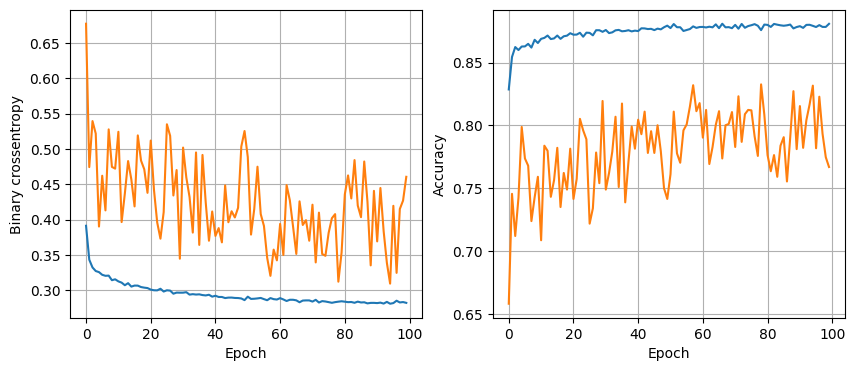

119/119 [==============================] - 0s 394us/step - loss: 0.3259 - accuracy: 0.8730
16 nodes, dropout 0, lr 0.01, batch size 64


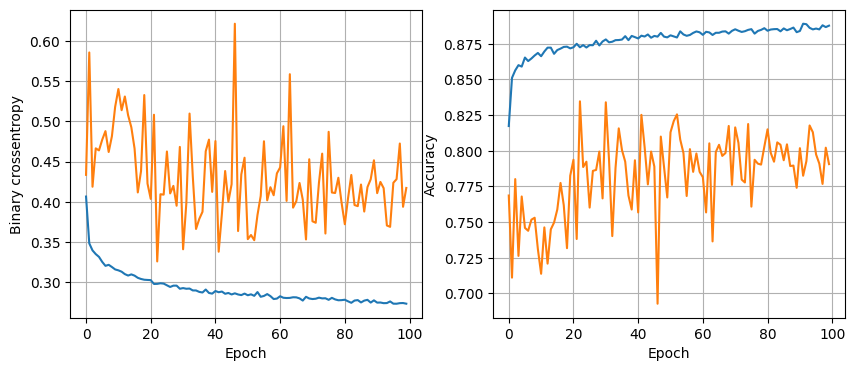

119/119 [==============================] - 0s 383us/step - loss: 0.3148 - accuracy: 0.8704
16 nodes, dropout 0, lr 0.01, batch size 128


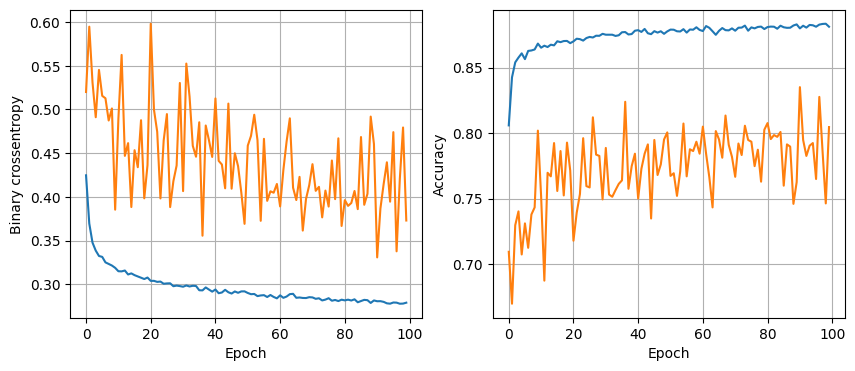

119/119 [==============================] - 0s 371us/step - loss: 0.3332 - accuracy: 0.8686
16 nodes, dropout 0, lr 0.005, batch size 32


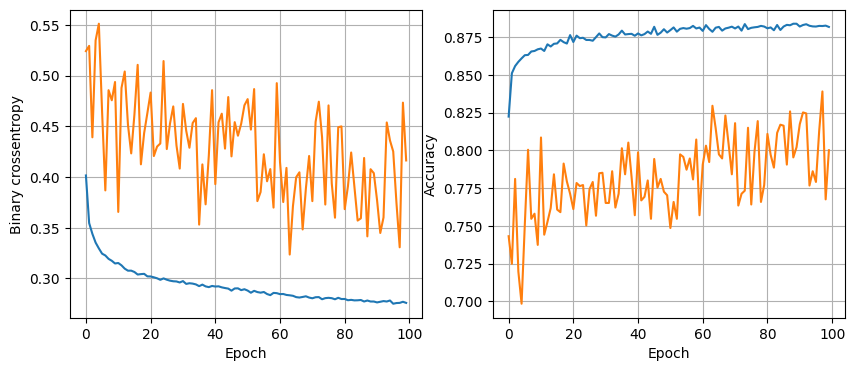

119/119 [==============================] - 0s 375us/step - loss: 0.3172 - accuracy: 0.8730
16 nodes, dropout 0, lr 0.005, batch size 64


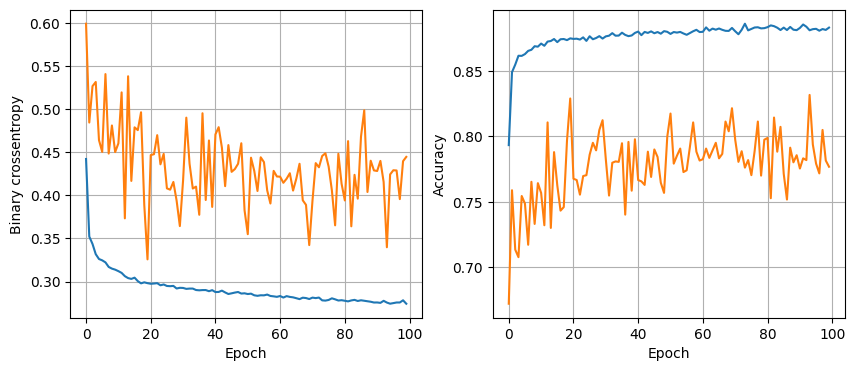

119/119 [==============================] - 0s 366us/step - loss: 0.3220 - accuracy: 0.8696
16 nodes, dropout 0, lr 0.005, batch size 128


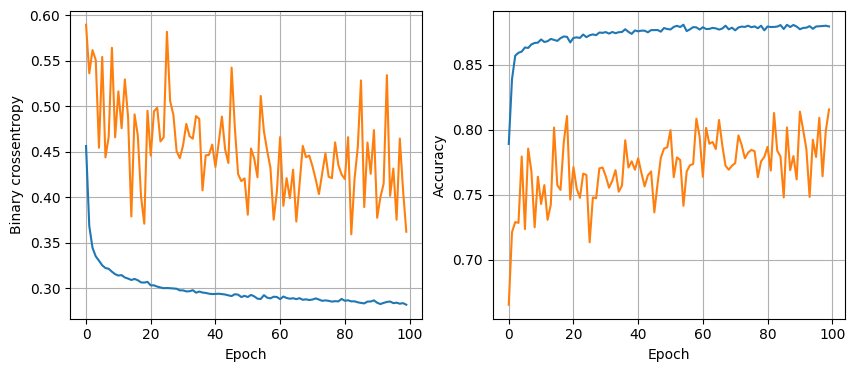

119/119 [==============================] - 0s 384us/step - loss: 0.3357 - accuracy: 0.8578
16 nodes, dropout 0, lr 0.001, batch size 32


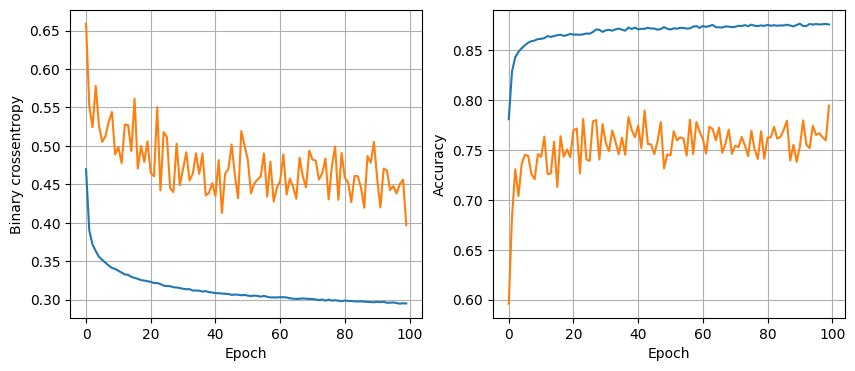

119/119 [==============================] - 0s 382us/step - loss: 0.3212 - accuracy: 0.8680
16 nodes, dropout 0, lr 0.001, batch size 64


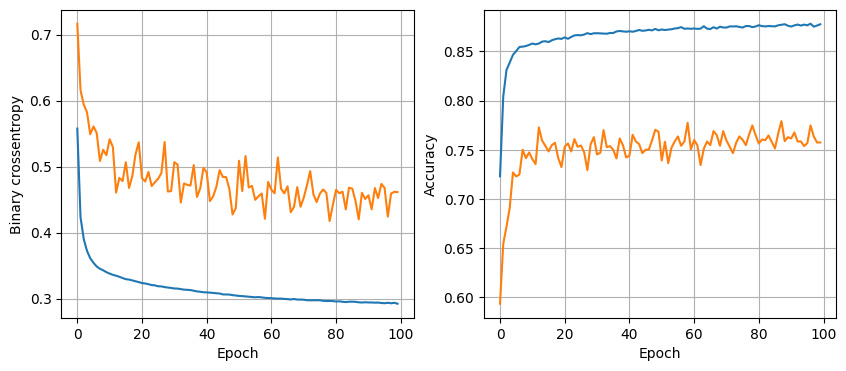

119/119 [==============================] - 0s 388us/step - loss: 0.3140 - accuracy: 0.8733
16 nodes, dropout 0, lr 0.001, batch size 128


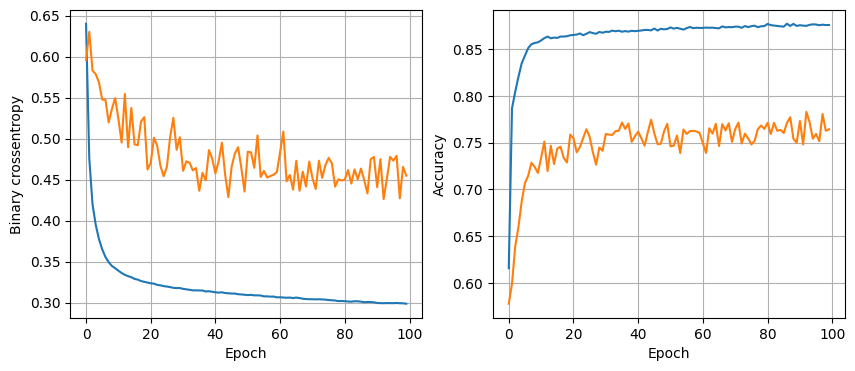

119/119 [==============================] - 0s 389us/step - loss: 0.3128 - accuracy: 0.8762
16 nodes, dropout 0.2, lr 0.01, batch size 32


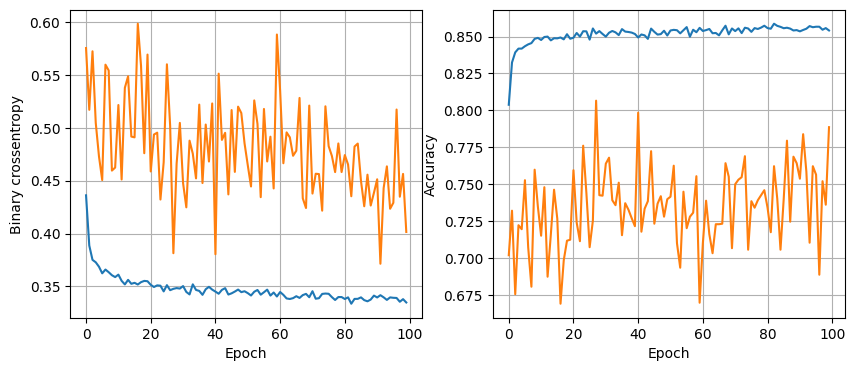

119/119 [==============================] - 0s 377us/step - loss: 0.3291 - accuracy: 0.8638
16 nodes, dropout 0.2, lr 0.01, batch size 64


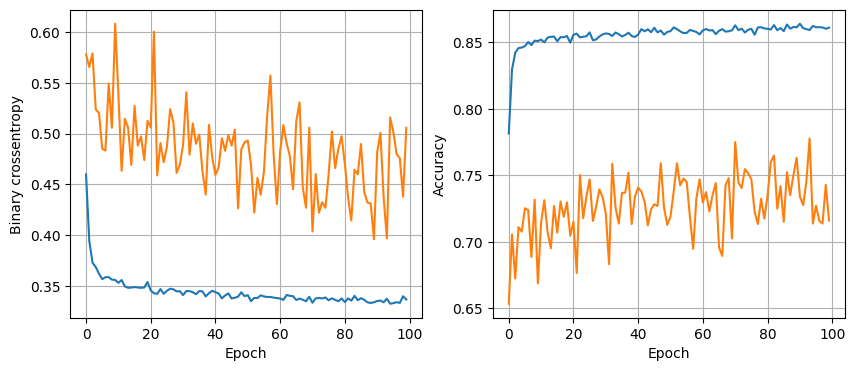

119/119 [==============================] - 0s 378us/step - loss: 0.3156 - accuracy: 0.8736
16 nodes, dropout 0.2, lr 0.01, batch size 128


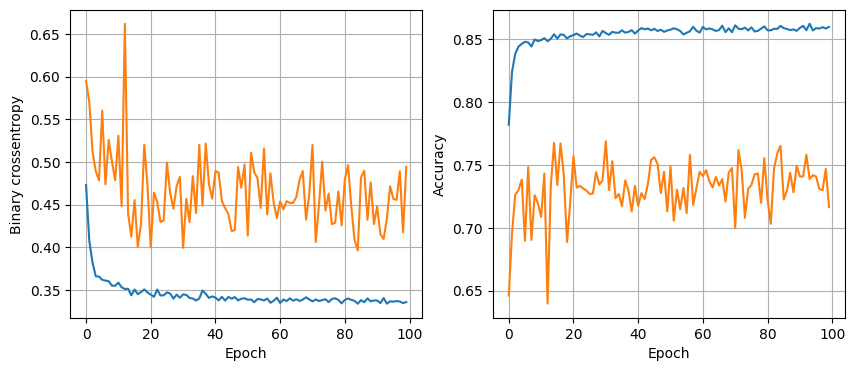

119/119 [==============================] - 0s 392us/step - loss: 0.3172 - accuracy: 0.8686
16 nodes, dropout 0.2, lr 0.005, batch size 32


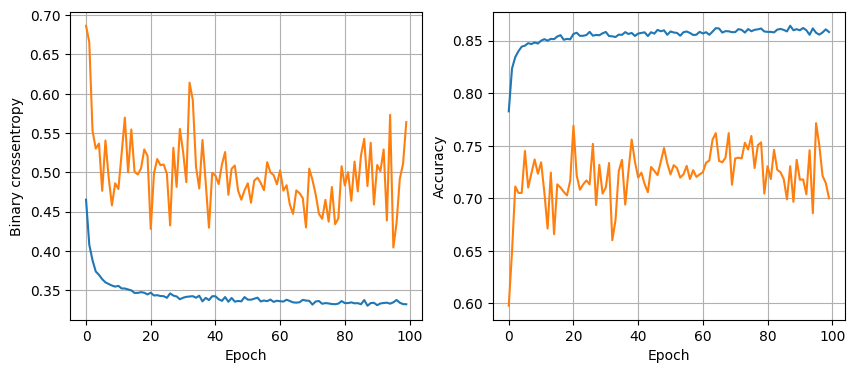

119/119 [==============================] - 0s 388us/step - loss: 0.3174 - accuracy: 0.8696
16 nodes, dropout 0.2, lr 0.005, batch size 64


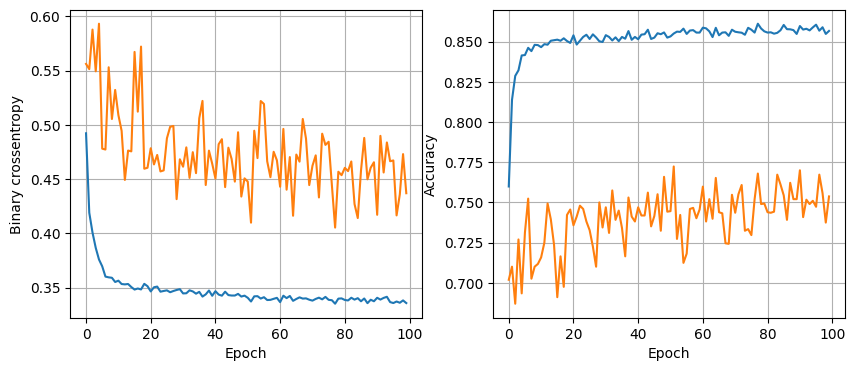

119/119 [==============================] - 0s 402us/step - loss: 0.3218 - accuracy: 0.8715
16 nodes, dropout 0.2, lr 0.005, batch size 128


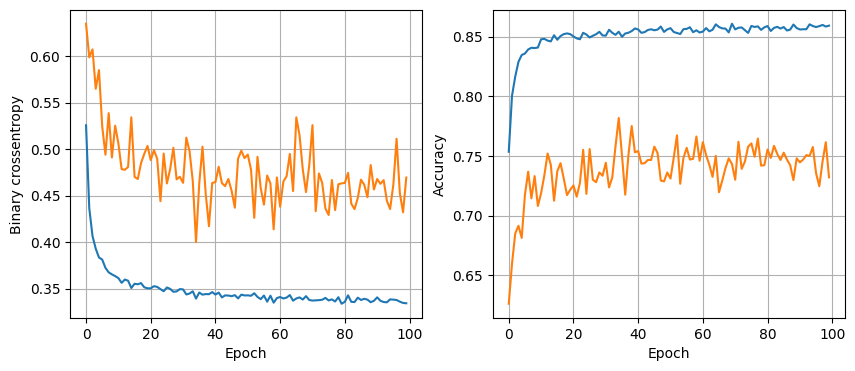

119/119 [==============================] - 0s 391us/step - loss: 0.3212 - accuracy: 0.8665
16 nodes, dropout 0.2, lr 0.001, batch size 32


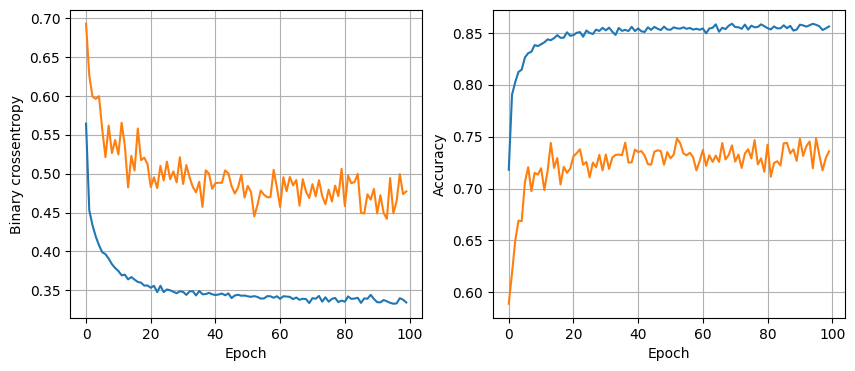

119/119 [==============================] - 0s 382us/step - loss: 0.3146 - accuracy: 0.8709
16 nodes, dropout 0.2, lr 0.001, batch size 64


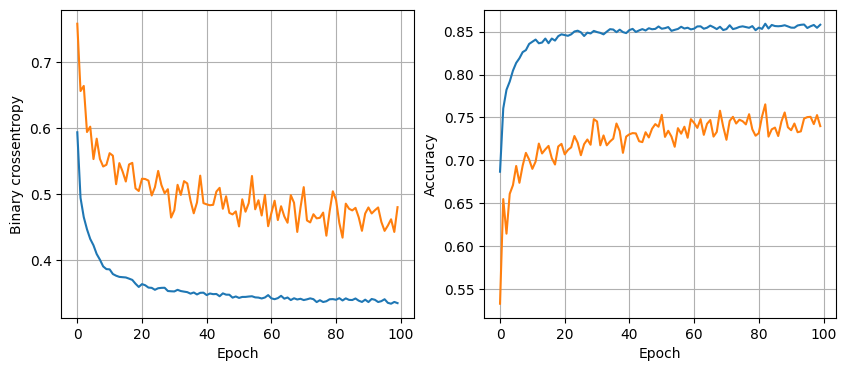

119/119 [==============================] - 0s 388us/step - loss: 0.3199 - accuracy: 0.8709
16 nodes, dropout 0.2, lr 0.001, batch size 128


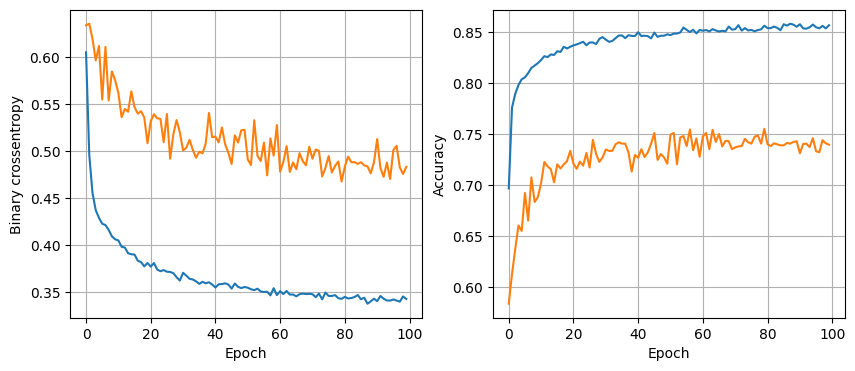

119/119 [==============================] - 0s 372us/step - loss: 0.3193 - accuracy: 0.8730
32 nodes, dropout 0, lr 0.01, batch size 32


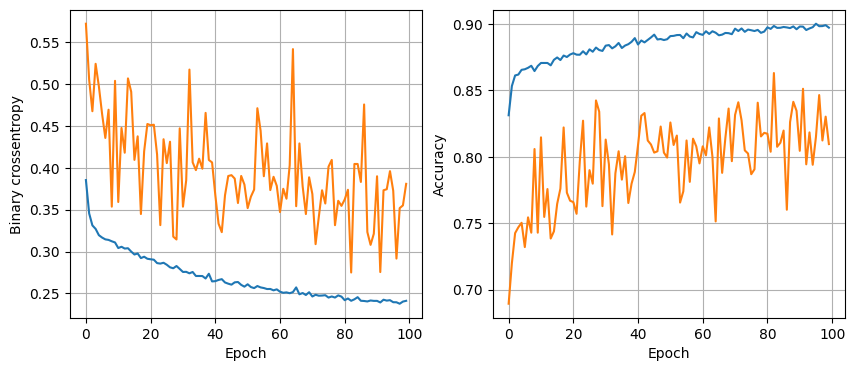

119/119 [==============================] - 0s 393us/step - loss: 0.3776 - accuracy: 0.8670
32 nodes, dropout 0, lr 0.01, batch size 64


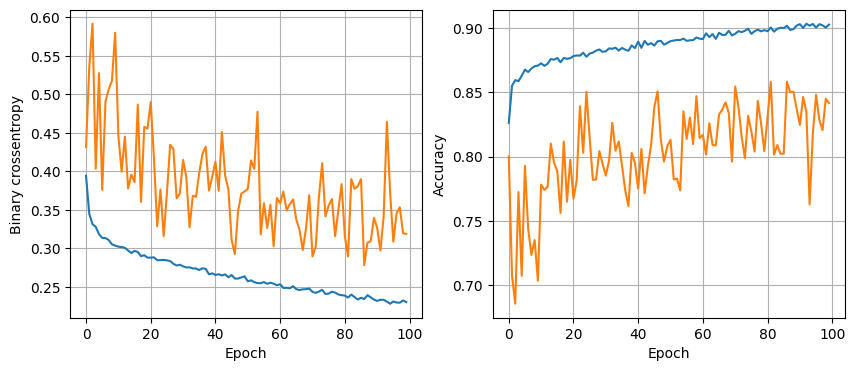

119/119 [==============================] - 0s 389us/step - loss: 0.3785 - accuracy: 0.8678
32 nodes, dropout 0, lr 0.01, batch size 128


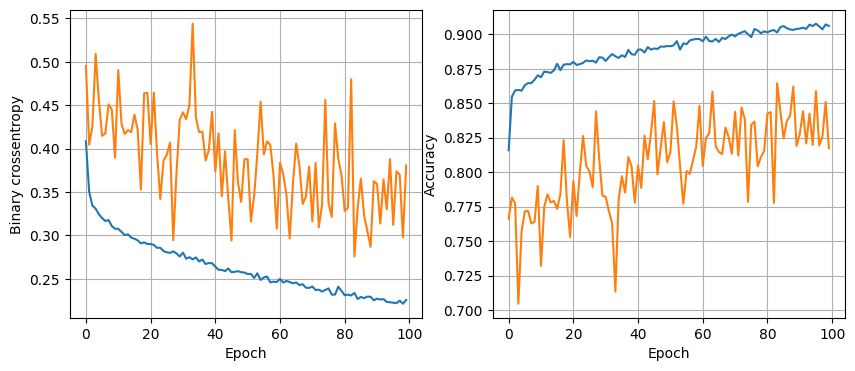

119/119 [==============================] - 0s 378us/step - loss: 0.3936 - accuracy: 0.8651
32 nodes, dropout 0, lr 0.005, batch size 32


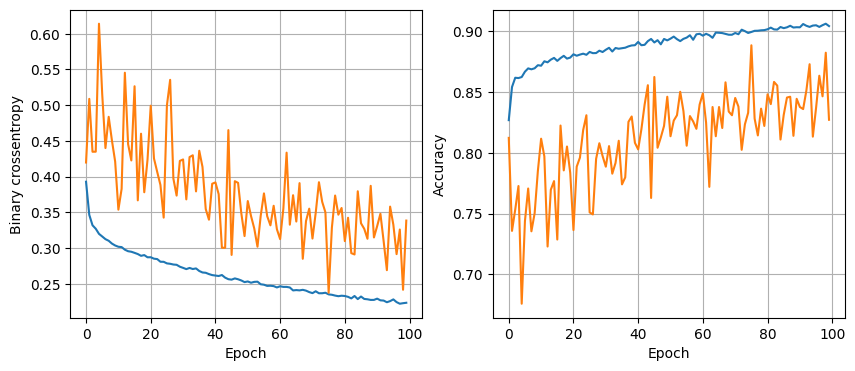

119/119 [==============================] - 0s 386us/step - loss: 0.3845 - accuracy: 0.8617
32 nodes, dropout 0, lr 0.005, batch size 64


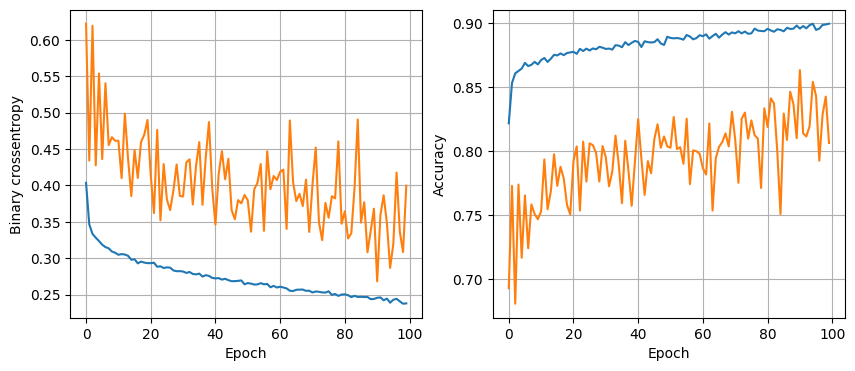

119/119 [==============================] - 0s 377us/step - loss: 0.3706 - accuracy: 0.8672
32 nodes, dropout 0, lr 0.005, batch size 128


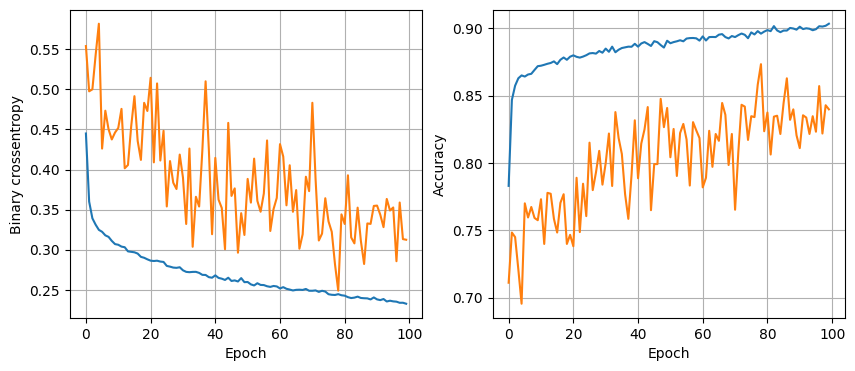

119/119 [==============================] - 0s 385us/step - loss: 0.3430 - accuracy: 0.8657
32 nodes, dropout 0, lr 0.001, batch size 32


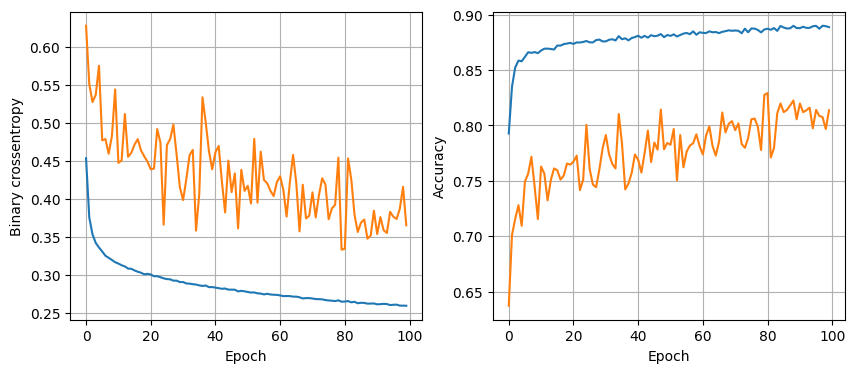

119/119 [==============================] - 0s 416us/step - loss: 0.3166 - accuracy: 0.8699
32 nodes, dropout 0, lr 0.001, batch size 64


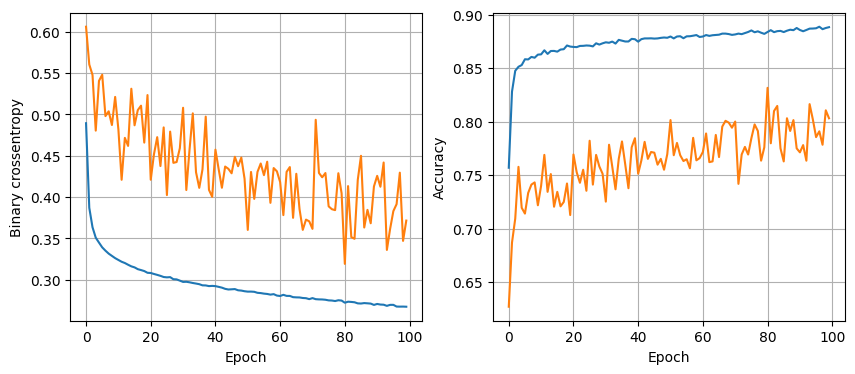

119/119 [==============================] - 0s 369us/step - loss: 0.3153 - accuracy: 0.8759
32 nodes, dropout 0, lr 0.001, batch size 128


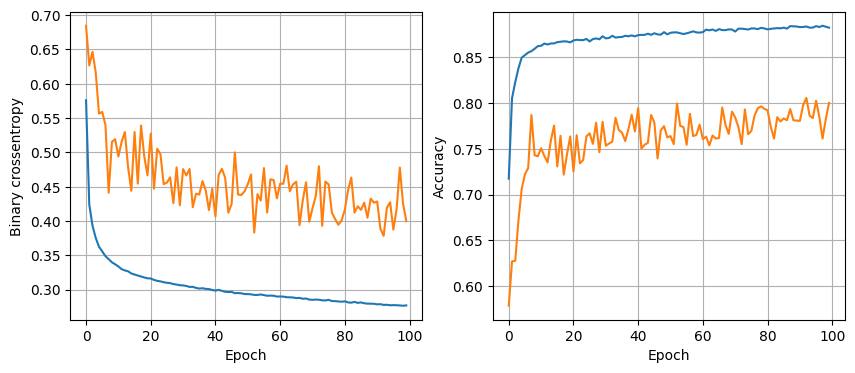

119/119 [==============================] - 0s 378us/step - loss: 0.3181 - accuracy: 0.8691
32 nodes, dropout 0.2, lr 0.01, batch size 32


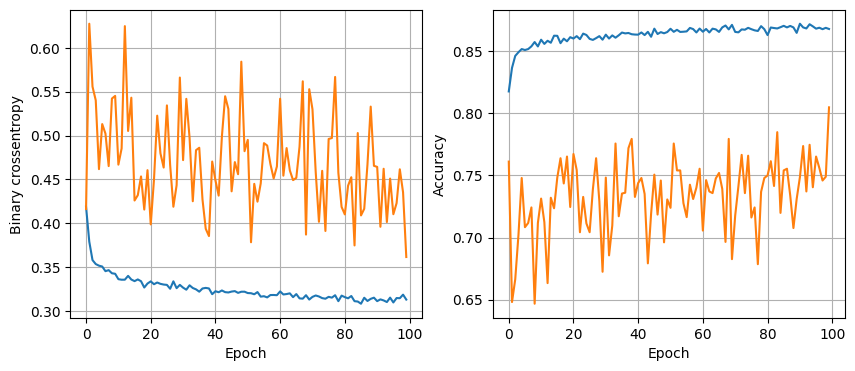

119/119 [==============================] - 0s 396us/step - loss: 0.3067 - accuracy: 0.8814
32 nodes, dropout 0.2, lr 0.01, batch size 64


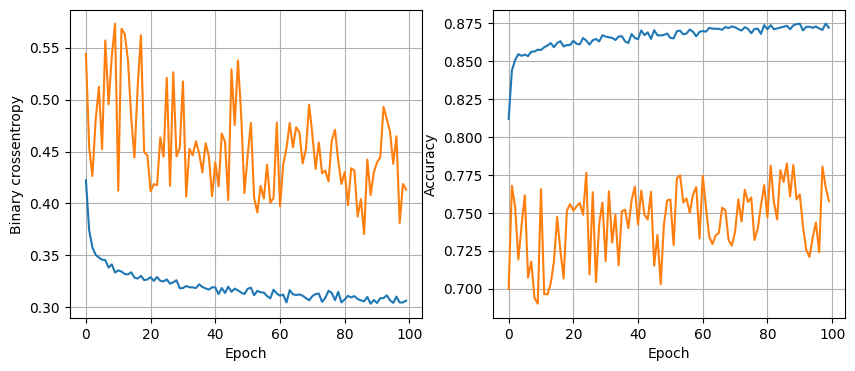

119/119 [==============================] - 0s 404us/step - loss: 0.3094 - accuracy: 0.8770
32 nodes, dropout 0.2, lr 0.01, batch size 128


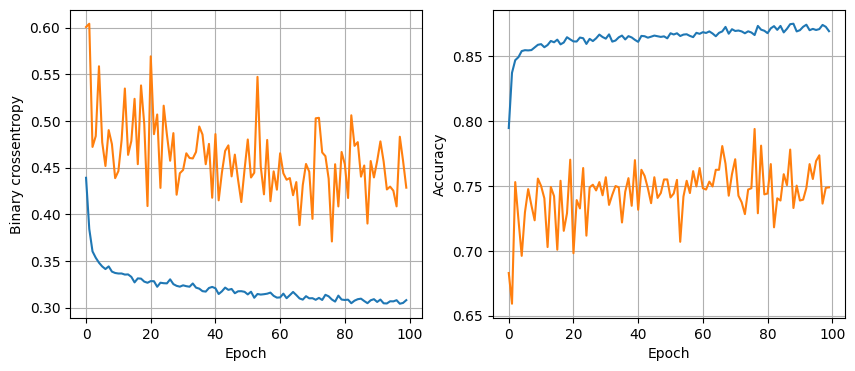

119/119 [==============================] - 0s 413us/step - loss: 0.3087 - accuracy: 0.8720
32 nodes, dropout 0.2, lr 0.005, batch size 32


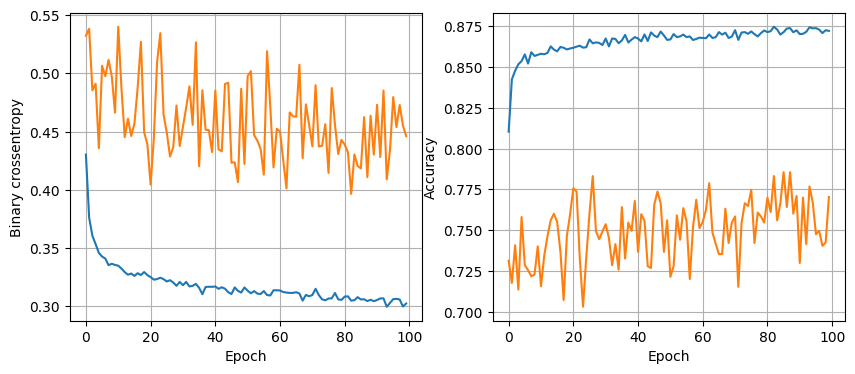

119/119 [==============================] - 0s 400us/step - loss: 0.3030 - accuracy: 0.8770
32 nodes, dropout 0.2, lr 0.005, batch size 64


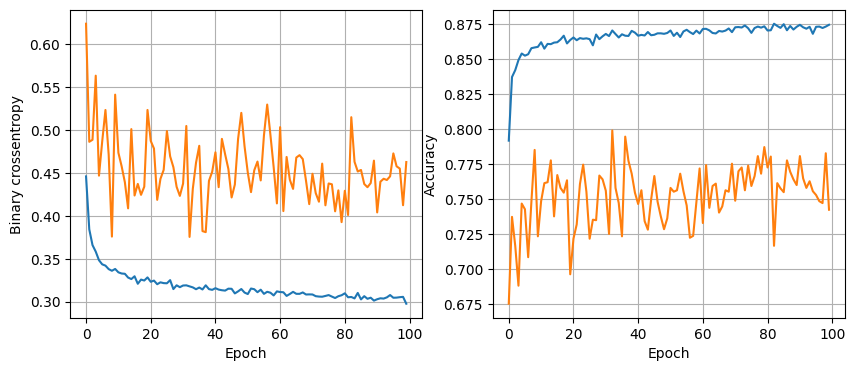

119/119 [==============================] - 0s 440us/step - loss: 0.3023 - accuracy: 0.8764
32 nodes, dropout 0.2, lr 0.005, batch size 128


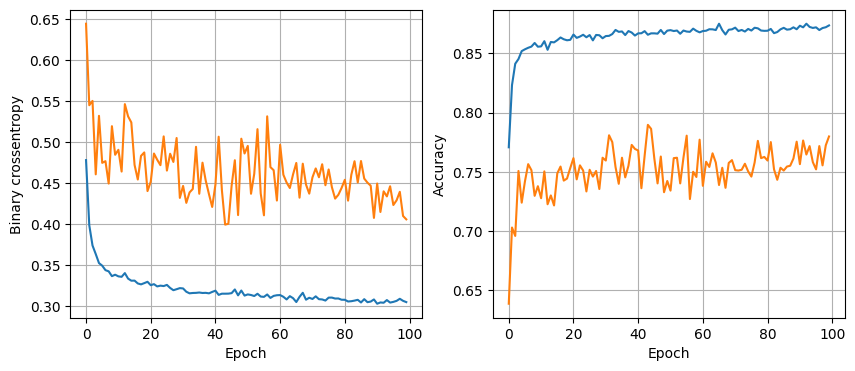

119/119 [==============================] - 0s 533us/step - loss: 0.3051 - accuracy: 0.8762
32 nodes, dropout 0.2, lr 0.001, batch size 32


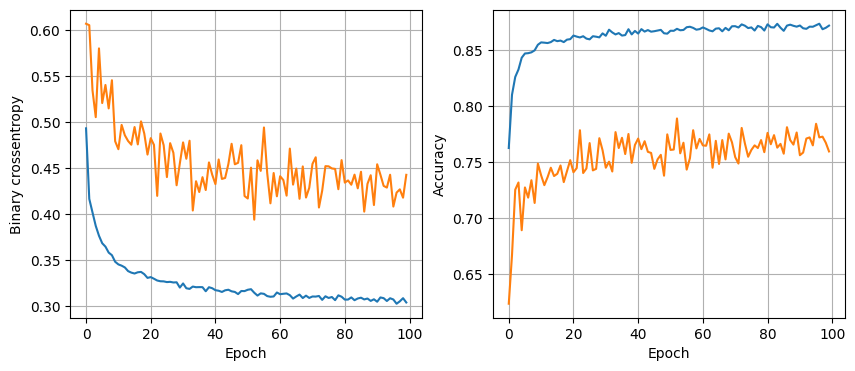

119/119 [==============================] - 0s 392us/step - loss: 0.3030 - accuracy: 0.8772
32 nodes, dropout 0.2, lr 0.001, batch size 64


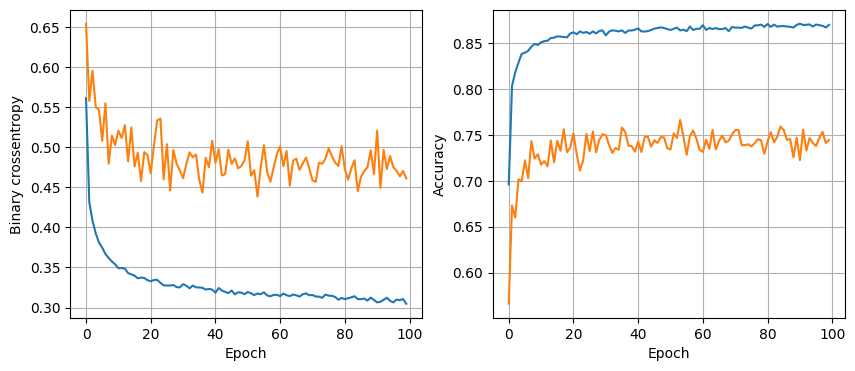

119/119 [==============================] - 0s 384us/step - loss: 0.3025 - accuracy: 0.8749
32 nodes, dropout 0.2, lr 0.001, batch size 128


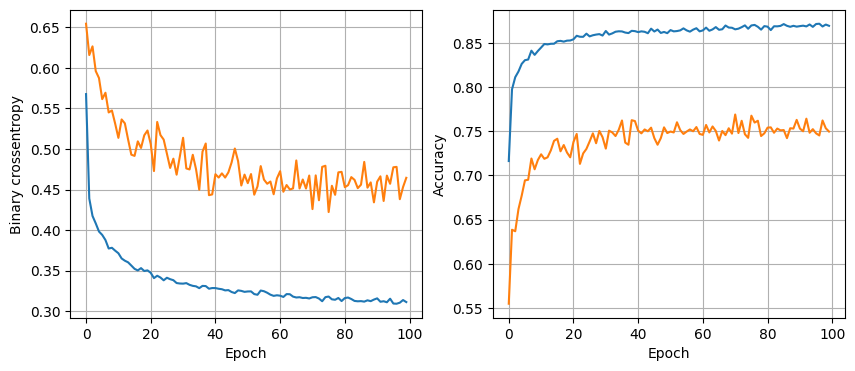

119/119 [==============================] - 0s 379us/step - loss: 0.3053 - accuracy: 0.8796
64 nodes, dropout 0, lr 0.01, batch size 32


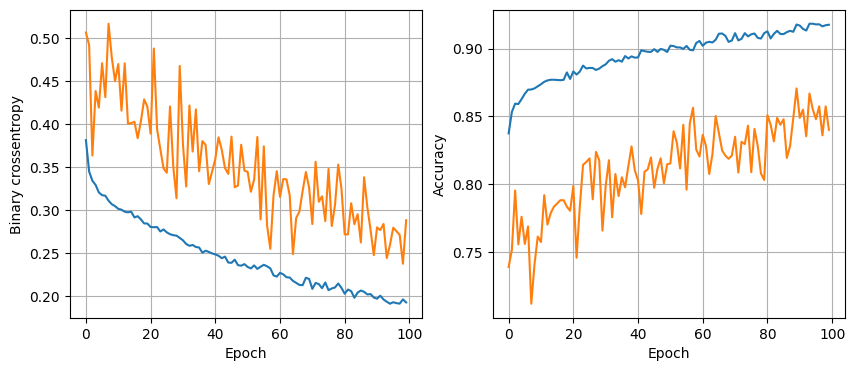

119/119 [==============================] - 0s 396us/step - loss: 0.5061 - accuracy: 0.8578
64 nodes, dropout 0, lr 0.01, batch size 64


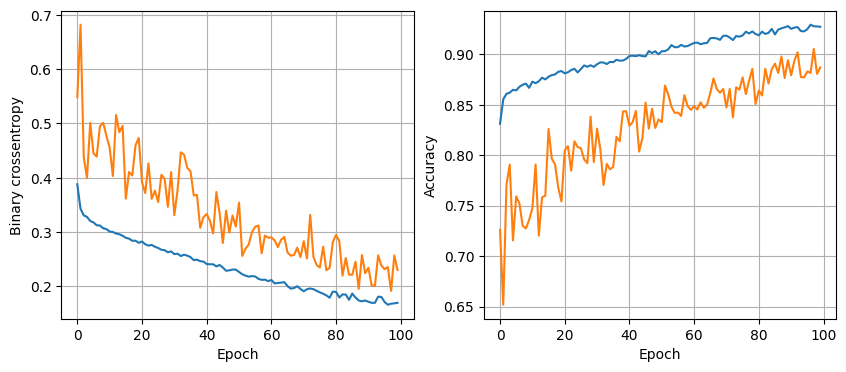

119/119 [==============================] - 0s 396us/step - loss: 0.5790 - accuracy: 0.8573
64 nodes, dropout 0, lr 0.01, batch size 128


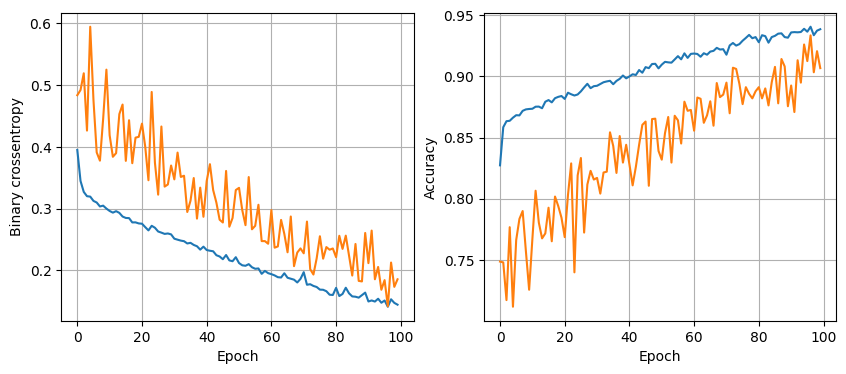

119/119 [==============================] - 0s 421us/step - loss: 0.6156 - accuracy: 0.8491
64 nodes, dropout 0, lr 0.005, batch size 32


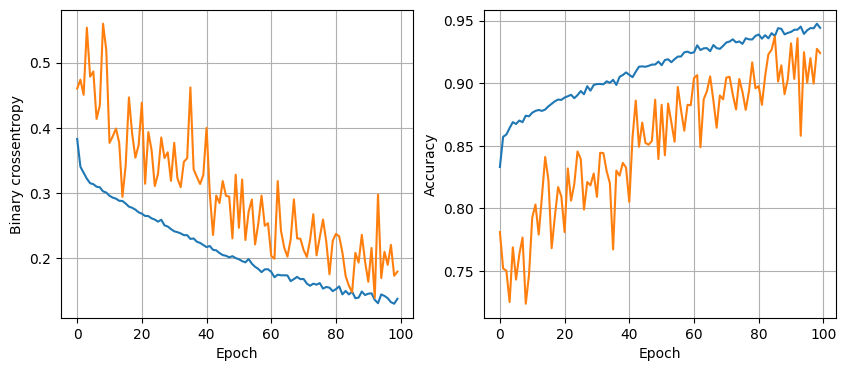

119/119 [==============================] - 0s 398us/step - loss: 0.6600 - accuracy: 0.8449
64 nodes, dropout 0, lr 0.005, batch size 64


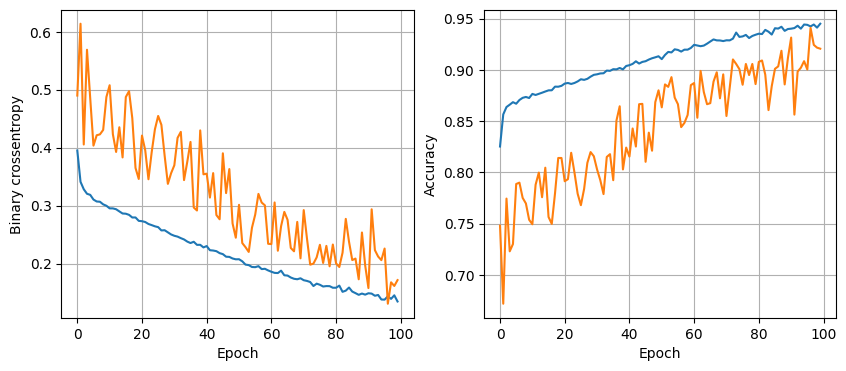

119/119 [==============================] - 0s 391us/step - loss: 0.5637 - accuracy: 0.8583
64 nodes, dropout 0, lr 0.005, batch size 128


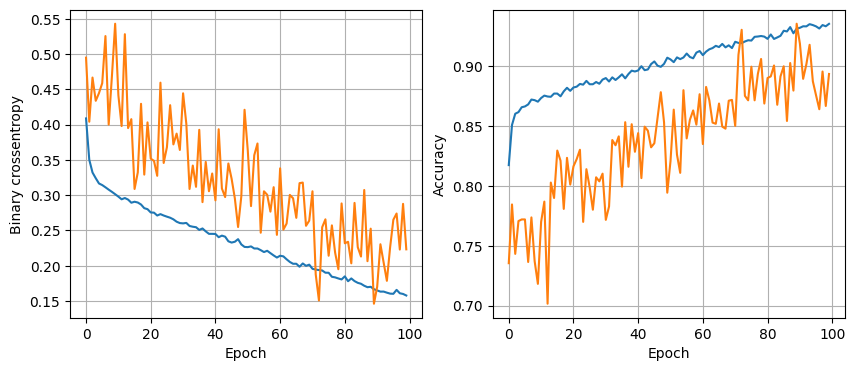

119/119 [==============================] - 0s 484us/step - loss: 0.4702 - accuracy: 0.8665
64 nodes, dropout 0, lr 0.001, batch size 32


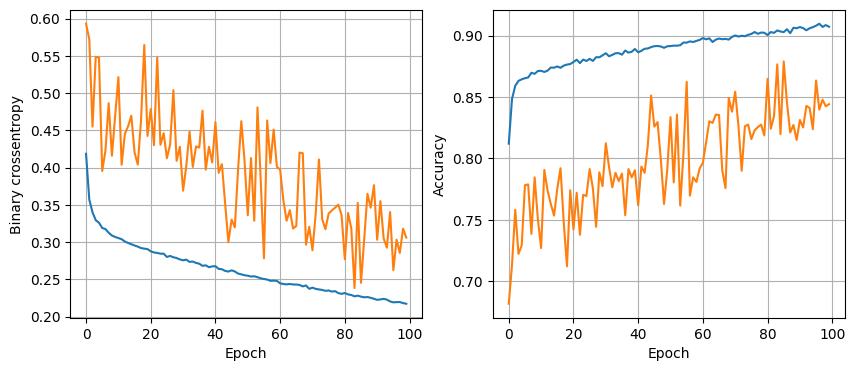

119/119 [==============================] - 0s 406us/step - loss: 0.3414 - accuracy: 0.8709
64 nodes, dropout 0, lr 0.001, batch size 64


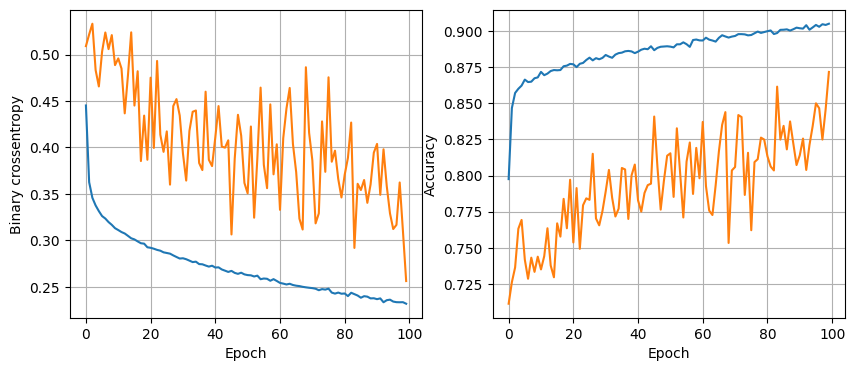

119/119 [==============================] - 0s 401us/step - loss: 0.3471 - accuracy: 0.8604
64 nodes, dropout 0, lr 0.001, batch size 128


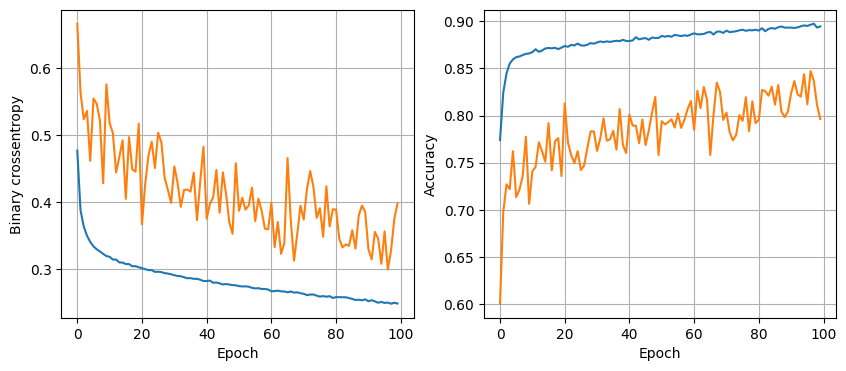

119/119 [==============================] - 0s 402us/step - loss: 0.3216 - accuracy: 0.8746
64 nodes, dropout 0.2, lr 0.01, batch size 32


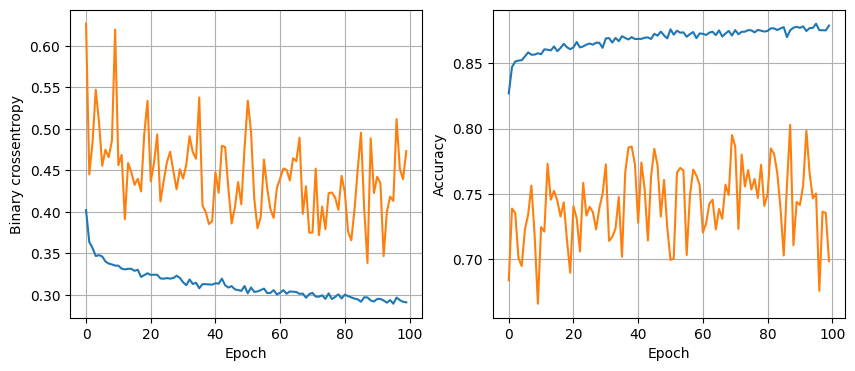

119/119 [==============================] - 0s 464us/step - loss: 0.3222 - accuracy: 0.8649
64 nodes, dropout 0.2, lr 0.01, batch size 64


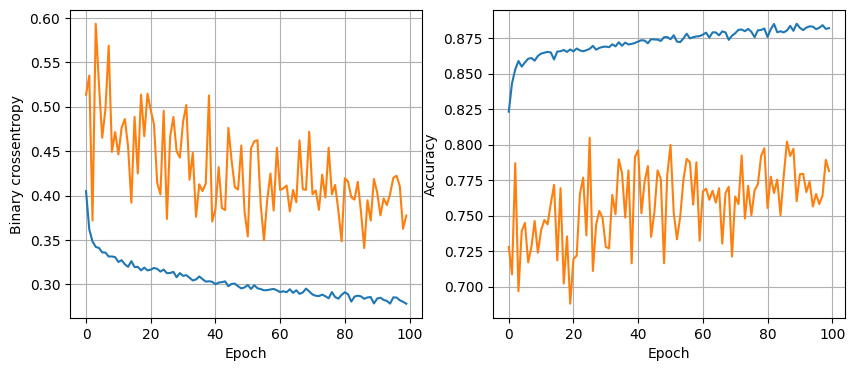

119/119 [==============================] - 0s 393us/step - loss: 0.3048 - accuracy: 0.8835
64 nodes, dropout 0.2, lr 0.01, batch size 128


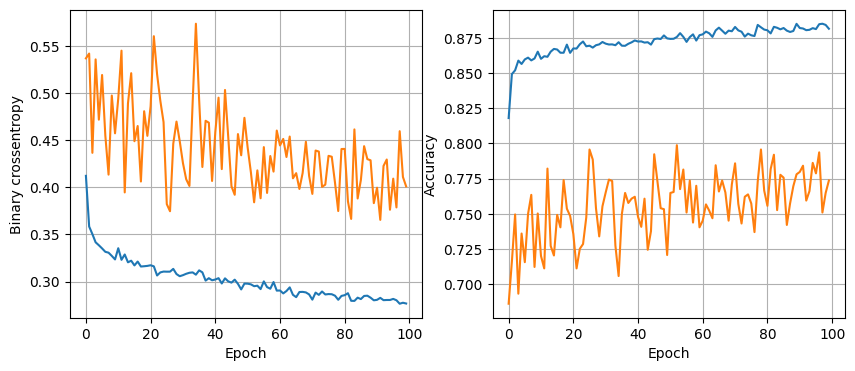

119/119 [==============================] - 0s 440us/step - loss: 0.3091 - accuracy: 0.8791
64 nodes, dropout 0.2, lr 0.005, batch size 32


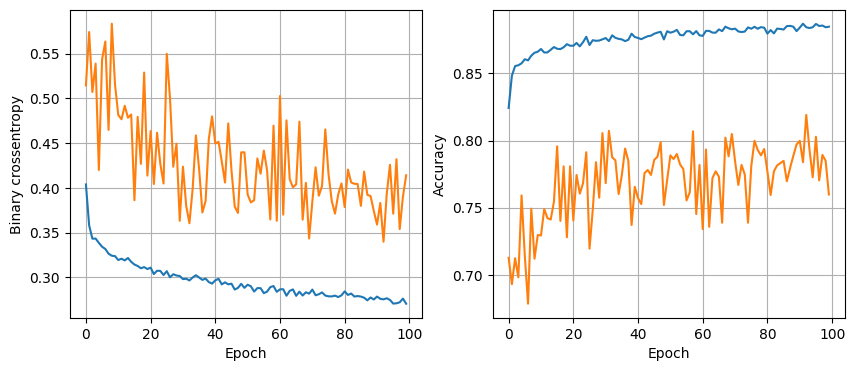

119/119 [==============================] - 0s 405us/step - loss: 0.3057 - accuracy: 0.8762
64 nodes, dropout 0.2, lr 0.005, batch size 64


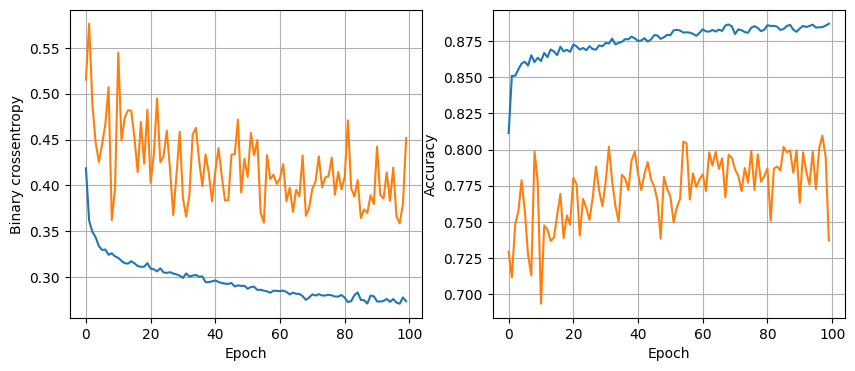

119/119 [==============================] - 0s 408us/step - loss: 0.3103 - accuracy: 0.8733
64 nodes, dropout 0.2, lr 0.005, batch size 128


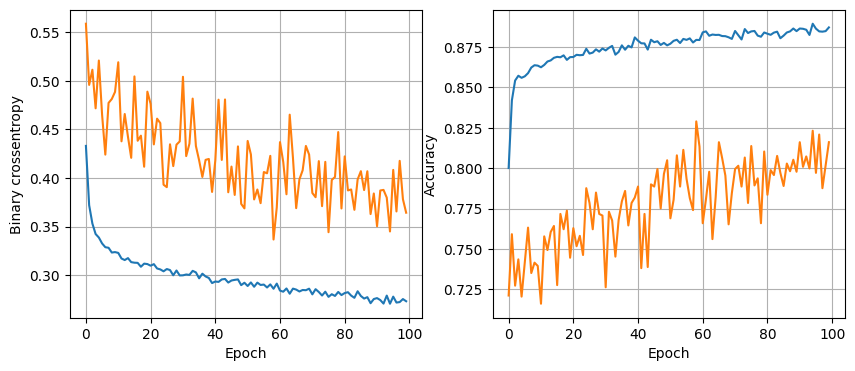

119/119 [==============================] - 0s 460us/step - loss: 0.3078 - accuracy: 0.8801
64 nodes, dropout 0.2, lr 0.001, batch size 32


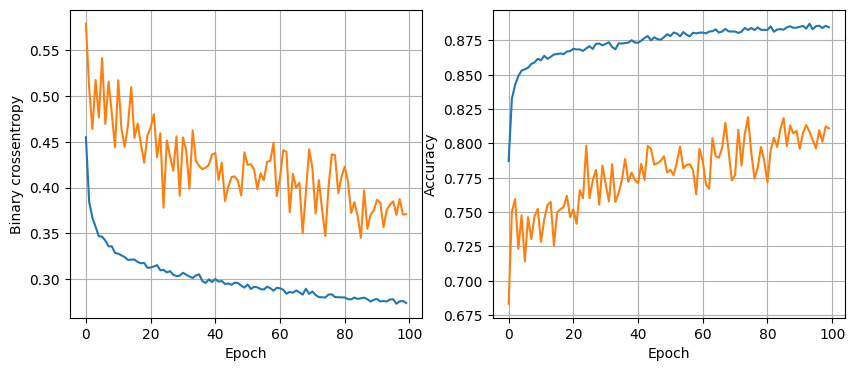

119/119 [==============================] - 0s 411us/step - loss: 0.2987 - accuracy: 0.8835
64 nodes, dropout 0.2, lr 0.001, batch size 64


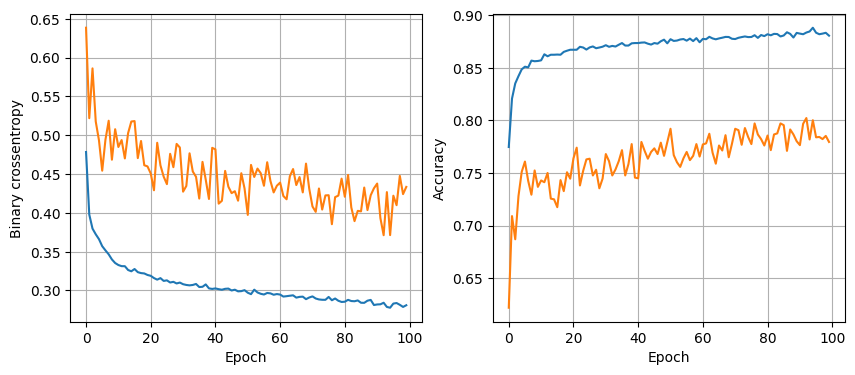

119/119 [==============================] - 0s 475us/step - loss: 0.2995 - accuracy: 0.8799
64 nodes, dropout 0.2, lr 0.001, batch size 128


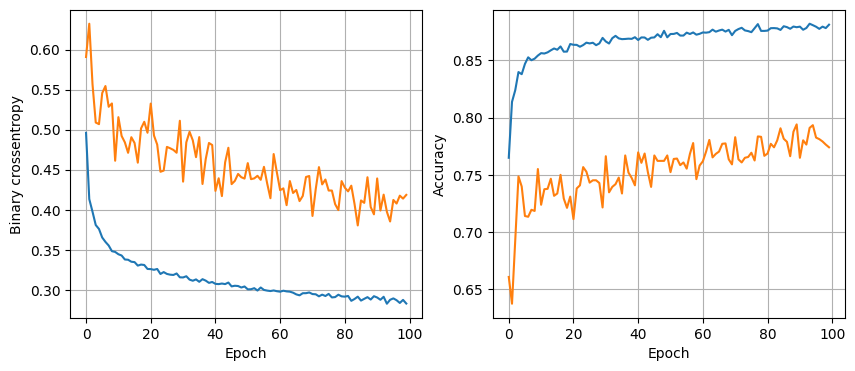

119/119 [==============================] - 0s 403us/step - loss: 0.2980 - accuracy: 0.8788


In [66]:
least_val_loss = float('inf')
least_loss_model = None
epochs=100
for num_nodes in [16, 32, 64]:
  for dropout_prob in[0, 0.2]:
    for lr in [0.01, 0.005, 0.001]:
      for batch_size in [32, 64, 128]:
        print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch size {batch_size}")
        model, history = train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
        plot_history(history)
        val_loss = model.evaluate(X_valid, y_valid)[0]
        if val_loss < least_val_loss:
          least_val_loss = val_loss
          least_loss_model = model